In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as stats
import matplotlib.patches as patches

from utils import dibuja_covar, dibuja_covar_ax

In [2]:
#definimos los ticvkers de los activos que vamos a usar
assets = ['AAPL', 'APA', 'CMCSA', 'CSCO', 'CPB', 'JCI', 'MO', 'MSFT', 'TGT']

In [3]:
num_act = len(assets) # number of assets
num_datos = 6000 # number of data points

rs = np.random.RandomState(seed=123) # Here we create like a session of random numbers that allows to reproduce the results

# We create a random matrix of returns
# The matrix is num_datos x num_act
samp_ind = rs.randn(num_datos, num_act) # a sample from independent standard normal distribution

corr_ind = np.corrcoef(samp_ind, rowvar=False) # correlation of the independent sample

In [4]:
# Nos bajamos los precios de cierre ajustados entre dos fechas
start = '1990-12-30'
end = '2022-12-31'

prices = yf.download(assets, start=start, end=end)['Adj Close']
ret = prices.pct_change().dropna()

[*********************100%%**********************]  9 of 9 completed


In [5]:
# Calculate statistics of daily returns
mu = np.mean(ret, axis=0).to_numpy().reshape(-1,1)
std = np.std(ret, axis=0).to_numpy().reshape(-1,1)
#mu = ret.mean().to_numpy().reshape(-1,1) # mean vector
cov = ret.cov().to_numpy() # covariance matrix
corr = ret.corr().to_numpy() # correlation matrix
#std = np.diag(cov).reshape(-1,1) # standard deviation vector
skew = ret.skew()
kurt = ret.kurt()

corr_ret = np.corrcoef(ret, rowvar=False) #Matrix of correlation of the returns

In [34]:
kk = np.array([[1,2,3],[4,5,6],[7,8,9], [10,11,12], [13,14,15], [16,17,18], [19,20,21], [22,23,24], [25,26,27]])
kk.shape

(9, 3)

In [31]:
kk_std = np.array([1, 10, 100]).reshape(-1, 1)

In [33]:
kk_std.shape

(3, 1)

In [32]:
kk * kk_std.T

array([[   1,   20,  300],
       [   4,   50,  600],
       [   7,   80,  900],
       [  10,  110, 1200],
       [  13,  140, 1500],
       [  16,  170, 1800],
       [  19,  200, 2100],
       [  22,  230, 2400],
       [  25,  260, 2700]])

In [49]:
std.T.shape

(1, 9)

In [51]:
np.multiply((samp_ind @ L.T), std.T)

array([[-8.12210024e-04,  6.25874492e-04,  8.84057685e-05, ...,
        -6.92289728e-04, -3.64146187e-04,  3.17225107e-04],
       [-6.48448230e-04, -6.48790067e-04, -2.08310113e-04, ...,
        -9.40266500e-05,  4.56173510e-04,  7.74422339e-04],
       [ 7.51178751e-04,  4.39957978e-04,  5.03026632e-04, ...,
        -1.22022682e-04,  1.26905722e-05,  5.65135382e-04],
       ...,
       [-3.59405842e-04,  2.75407976e-04,  7.09507157e-05, ...,
         1.98758265e-04, -2.25111639e-04,  2.00636976e-04],
       [-5.76668345e-04, -3.06261254e-04, -1.16426800e-04, ...,
         9.70050486e-05, -4.61024024e-05, -6.84606528e-04],
       [ 4.03444922e-04, -3.86191223e-04, -2.40635770e-04, ...,
         6.92806103e-04,  7.80035900e-04, -4.40317309e-04]])

In [7]:
L = np.linalg.cholesky(cov) # Cholesky decomposition of the covariance matrix of the returns of the assets

samp_norm = (samp_ind @ L.T) * std.T + mu.T # a sample of a normal distribution with mean mu, stnadard deviation std and  with correlation matrix corr

corr_samp_norm = np.corrcoef(samp_norm, rowvar=False) #Matrix of correlation of the generated sample using the correlation matrix

In [55]:
np.std(ret, axis=0)

AAPL     0.027351
APA      0.028121
CMCSA    0.022247
CPB      0.015193
CSCO     0.025164
JCI      0.023253
MO       0.016641
MSFT     0.019957
TGT      0.020405
dtype: float64

In [52]:
kk_2 = (samp_ind @ L.T)[:2, :]
kk_2

array([[-0.02969537,  0.02225684,  0.00397376, -0.02254427, -0.02246175,
         0.02978716, -0.0416003 , -0.01824641,  0.01554606],
       [-0.02370804, -0.02307174, -0.00936336,  0.01973963, -0.02220107,
        -0.01626023, -0.00565014,  0.02285766,  0.03795165]])

In [54]:
std.T

array([[0.02735141, 0.02812055, 0.02224737, 0.01519331, 0.02516393,
        0.02325333, 0.01664146, 0.01995714, 0.0204055 ]])

In [53]:
kk_2 *std.T

array([[-8.12210024e-04,  6.25874492e-04,  8.84057685e-05,
        -3.42522072e-04, -5.65225930e-04,  6.92650629e-04,
        -6.92289728e-04, -3.64146187e-04,  3.17225107e-04],
       [-6.48448230e-04, -6.48790067e-04, -2.08310113e-04,
         2.99910204e-04, -5.58666128e-04, -3.78104513e-04,
        -9.40266500e-05,  4.56173510e-04,  7.74422339e-04]])

In [56]:
kk_norm = np.zeros((num_datos ,num_act))
for i in range(num_act):
    kk_norm[:, i] = samp_ind[:,i] * std[i] + mu[i]

In [61]:
kk_norm2 = (samp_ind @ L.T) * std.T + mu.T

In [21]:
samp_norm = (samp_ind @ L.T) * kk_std.T + kk_mu.T # a sample of a normal distribution with mean mu, stnadard deviation std and  with correlation matrix corr

corr_samp_norm = np.corrcoef(samp_norm, rowvar=False) #Matrix of correlation of the generated sample using the correlation matrix

In [19]:
(samp_ind @ L.T) * kk_mu.T

array([[-3.35879156e-05,  1.55411418e-05,  2.70490909e-06, ...,
        -2.69641215e-05, -1.69964012e-05,  1.09998078e-05],
       [-2.68157543e-05, -1.61101653e-05, -6.37353852e-06, ...,
        -3.66227178e-06,  2.12916763e-05,  2.68531497e-05],
       [ 3.10640447e-05,  1.09246377e-05,  1.53908127e-05, ...,
        -4.75267700e-06,  5.92293965e-07,  1.95961283e-05],
       ...,
       [-1.48627728e-05,  6.83867847e-06,  2.17084240e-06, ...,
         7.74146979e-06, -1.05069765e-05,  6.95711084e-06],
       [-2.38473882e-05, -7.60480204e-06, -3.56223814e-06, ...,
         3.77825782e-06, -2.15180253e-06, -2.37388068e-05],
       [ 1.66839531e-05, -9.58954686e-06, -7.36260048e-06, ...,
         2.69842467e-05,  3.64078838e-05, -1.52680356e-05]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.1453009476540244, 0.15657854479769123)

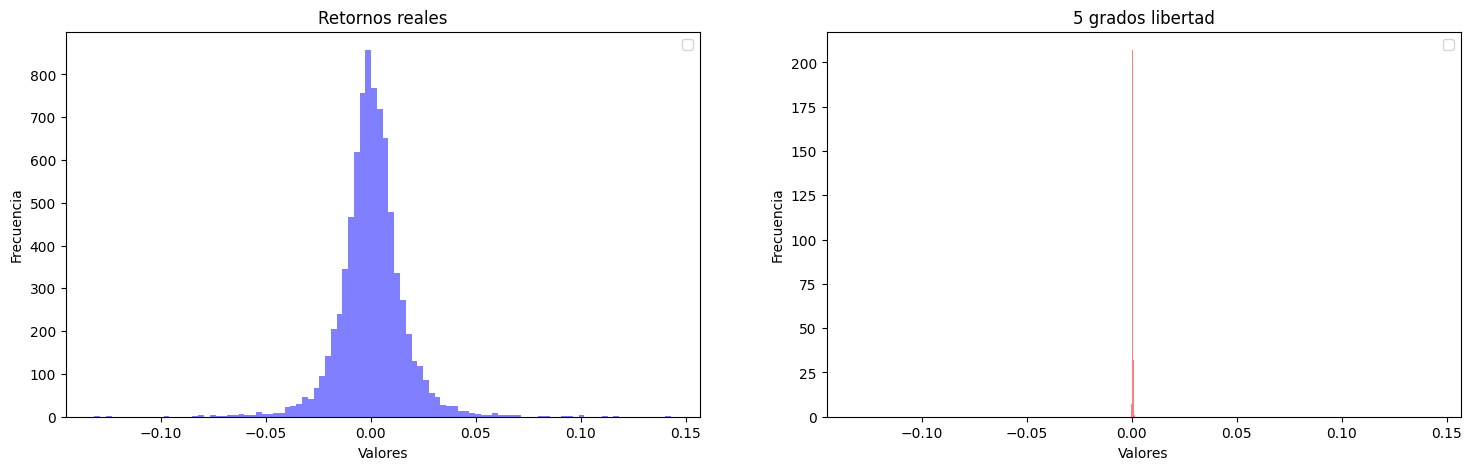

In [62]:

ejemplo = 3

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Primer histograma en el primer subplot
axs[0].hist(ret.iloc[:, ejemplo], bins=100, alpha=0.5, color='blue')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')
axs[0].legend(loc='upper right')
axs[0].set_title('Retornos reales')

# Segundo histograma en el segundo subplot
#axs[1].hist(samp_norm[:, ejemplo], bins=100, alpha=0.5, color='red')
axs[1].hist(kk_norm2[:, ejemplo], bins=100, alpha=0.5, color='red')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Frecuencia')
axs[1].legend(loc='upper right')
axs[1].set_title('5 grados libertad')

axs[1].set_xlim(axs[0].get_xlim())

# # Segundo histograma en el segundo subplot
# #axs[1].hist(samp_norm[:, ejemplo], bins=100, alpha=0.5, color='red')
# axs[2].hist(kk_norm_3[:, ejemplo], bins=100, alpha=0.5, color='red')
# axs[2].set_xlabel('Valores')
# axs[2].set_ylabel('Frecuencia')
# axs[2].legend(loc='upper right')
# axs[2].set_title('5 grados libertad')

# axs[2].set_xlim(axs[0].get_xlim())